# Handling Imbalanced Data in Customer Churn Prediction Problem

In this project, we want to go further for the Customer Churn Prediction problem. We want to deal with the Imbalance data of this dataset. 

- Importing necessary libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Importing Data 
We imported the preprocessed data of this dataset for simplicity. 

In [2]:
df = pd.read_csv("/kaggle/input/preprocessed-customer-churn/Preprocessed_CustomerChurn_Prediction.csv")
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2311,0,0,0,0,0.042254,1,0,0,0,0,...,False,False,True,True,False,False,False,False,False,True
3198,1,0,1,0,1.000000,1,1,1,1,1,...,True,False,False,False,False,True,True,False,False,False
5324,1,0,1,1,0.169014,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
946,0,0,1,1,0.478873,1,0,0,0,0,...,False,False,True,False,False,True,True,False,False,False
707,0,0,1,0,0.394366,1,0,0,0,1,...,False,True,False,True,False,False,False,True,False,False


As we worked on this dataset previously, we skip the preprocessing step and we use the achieved dataset from the previous project. For further information about the preprocessing step you can take a look at [this](https://www.kaggle.com/code/alishohadaee/dl-customer-churn-prediction) project: 
- https://www.kaggle.com/code/alishohadaee/dl-customer-churn-prediction

Hence, the dataset we imported here is the result of the preprocessing step in this project. 

## Splitting and Training

In [3]:
X = df.drop('Churn', axis=1)
y = testLabels = df.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [4]:
y.value_counts()

Churn
0.0    5163
1.0    1869
Name: count, dtype: int64

In [5]:
print("The ratio between the two categories in the dataset: ", 5163/1869)

The ratio between the two categories in the dataset:  2.7624398073836276


In [6]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
683,1,0,0,0,0.000000,1,0,0,0,0,...,False,True,False,True,False,False,False,False,False,True
2441,1,0,0,0,0.239437,1,1,0,1,0,...,False,True,False,True,False,False,False,True,False,False
1675,0,0,1,1,0.774648,1,1,0,0,0,...,False,False,True,False,True,False,False,False,False,True
2215,0,0,1,0,1.000000,1,0,1,1,0,...,True,False,False,False,False,True,True,False,False,False
2837,1,0,0,0,0.042254,0,0,1,0,1,...,True,False,False,True,False,False,False,False,False,True
5123,1,0,1,0,0.605634,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
4365,0,0,1,1,0.000000,1,0,0,0,0,...,False,False,True,True,False,False,True,False,False,False
4679,0,0,1,0,0.295775,1,0,0,0,1,...,False,True,False,True,False,False,False,True,False,False
2380,1,0,0,1,0.028169,0,0,0,1,0,...,True,False,False,True,False,False,False,False,False,True
6762,0,1,1,0,0.507042,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False


## Model Building 
Now, let's get into creating our model.

In [7]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

2024-04-27 14:39:43.709715: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-27 14:39:43.709862: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-27 14:39:43.862688: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In the next cell, we have created the ANN model as the method, so that in continue we become able to create other models faster. 

In [8]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    
    # Model 
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compiling the model
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight=weights)
    
    # Model evaluation on test data
    print("\n\nModel's accuracy on the test data is: ", model.evaluate(X_test, y_test))
    
    # Prediction on test data
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("\nClassification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [9]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7243 - loss: 0.5608
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7902 - loss: 0.4423
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7957 - loss: 0.4216
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7993 - loss: 0.4194
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7917 - loss: 0.4266
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8025 - loss: 0.4158
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8110 - loss: 0.4070
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7991 - loss: 0.4206
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8040 - loss: 0.4035
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8119 - loss: 0.4017
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8055 - loss: 0.4086
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

## Mitigating Skewness of Data

Imbalanced datasets occur when one class (the minority class) is significantly underrepresented compared to another class (the majority class). This can lead to biased models that perform poorly on predicting the minority class. Hence, mitigating them is an important step. 

The below illustration shows the difference and the skewness of our data.

Class 0: 5163
Class 1: 1869
Proportion: 2.76 : 1


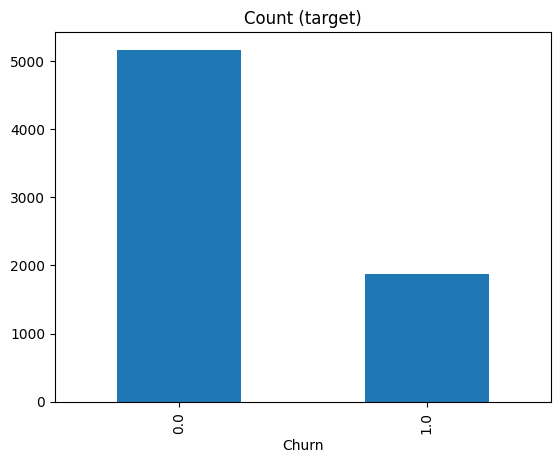

In [10]:
target_count = y.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In the following we want to take into account the methods that are suggested in [this](https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets) notebook to deal with this problem. 

### Undersampling
`Undersampling` involves reducing the number of instances in the majority class to match the number of instances in the minority class. By removing instances from the majority class, the dataset becomes more balanced, and the model may learn more effectively. However, undersampling can result in loss of information since it discards potentially useful data.

Common techniques for undersampling include:

   - `Random Undersampling`: Randomly select a subset of instances from the majority class to match the size of the minority class.
   - `Tomek Links`: Remove instances that form Tomek links, which are pairs of instances from different classes that are closest to each other. This method emphasizes the boundary between classes.
   - `NearMiss`: Select instances from the majority class that are closest to instances in the minority class.


#### Method 1: Random Undersampling 
In the following cell we did the random sampling as explained. 

In [11]:
# Class count
count_class_0, count_class_1 = df.Churn.value_counts()

# Divide by class
df_class_0 = df[df['Churn'] == 0]
df_class_1 = df[df['Churn'] == 1]

In [12]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling: ')
print(df_test_under.Churn.value_counts())

Random under-sampling: 
Churn
0    1869
1    1869
Name: count, dtype: int64


Then, we did the data splitting and model training on this new dataset again.

In [13]:
X = df_test_under.drop('Churn', axis=1)
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [14]:
# Number of classes in training Data
y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [15]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6566 - loss: 0.6345
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7530 - loss: 0.5204
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7596 - loss: 0.5012
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7326 - loss: 0.5230
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7507 - loss: 0.5014
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7641 - loss: 0.4896
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7584 - loss: 0.4901
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7569 - loss: 0.4811
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7713 - loss: 0.4694
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7736 - loss: 0.4662
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7674 - loss: 0.4844
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

Check classification report above. F1-score for minority class 1 improved from **0.55 to 0.72**. Score for class 0 reduced to 0.72 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

### Oversampling

`Oversampling` involves increasing the number of instances in the minority class to match the number of instances in the majority class. By replicating or synthesizing instances in the minority class, the dataset becomes more balanced, and the model may learn the minority class better. However, oversampling can lead to overfitting if not performed carefully.

Common techniques for oversampling include:

   - `Random Oversampling`: Randomly replicate instances from the minority class to match the size of the majority class.
   - `SMOTE (Synthetic Minority Over-sampling Technique)`: Generate synthetic instances for the minority class by interpolating between existing minority class instances.
   - `ADASYN (Adaptive Synthetic Sampling)`: Similar to SMOTE, but it focuses on generating more synthetic instances near the decision boundary.


#### Method 1: Random Oversampling
In the following we want to do the oversampling on the data as explained. 

In [16]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [17]:
X = df_test_over.drop('Churn', axis=1)
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [18]:
# Number of classes in training Data
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [19]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6491 - loss: 0.6045
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7586 - loss: 0.4951
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7627 - loss: 0.4854
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7690 - loss: 0.4739
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7763 - loss: 0.4675
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7783 - loss: 0.4600
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7723 - loss: 0.4721
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7742 - loss: 0.4653
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7768 - loss: 0.4661
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7821 - loss: 0.4551
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7774 - loss: 0.4606
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

Check classification report above. F1-score for minority class 1 improved from **0.55 to 0.80**. Score for class 0 reduced to 0.78 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

#### Method 3: SMOTE
Helps us to generate synthetic instances for the minority class. 

In [20]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

To install `imbalanced-learn` library use *`pip install imbalanced-learn`* command!

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [23]:
# Number of classes in training Data
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [24]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6356 - loss: 0.6244
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7789 - loss: 0.4729
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7854 - loss: 0.4580
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7885 - loss: 0.4525
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7910 - loss: 0.4477
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7884 - loss: 0.4481
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7874 - loss: 0.4471
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7890 - loss: 0.4472
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7947 - loss: 0.4358
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8005 - loss: 0.4323
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8040 - loss: 0.4207
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

In this case, SMOT Oversampling increases f1 score of minority class 1 from **0.55 to 0.78**, and also over all accuracy changed from 0.78 to 0.77